In [1]:
import pickle
from aemulusnu_massfunction.emulator_training import *
from aemulusnu_massfunction.fisher_utils import *

fiducial_h = 0.6736


# #(Plank 2018 table 2. TT,TE,EE+lowE+lensing  + neutrino mass put in by hand)
fiducial_cosmology = {'10^9 As':2.1,
                      'ns': 0.9649,
                      'H0': 67.36,
                      'w0': -1,
                      'ombh2': 0.02237,
                      'omch2': 0.12,
                      'nu_mass_ev': 0.06,}



#(Same as above but put in DES Y3 OmegaM and Sigma8)
Ωmh2 =  0.339*fiducial_h**2 # Y3 3x2pt
Ωνh2 = 0.06/(93.14) #see astro-ph/0603494
#From the BBN seciton of DES Y3 paper
Ωbh2 = 2.195/100
Ωch2 = Ωmh2-Ωbh2-Ωνh2
fiducial_cosmology = {'10^9 As': 1.520813,  #from σ8 for DES Y3 3x2 and convert_sigma8_to_As.ipynb
                      'ns': 0.9649,
                      'H0': 67.36,
                      'w0': -1,
                      'ombh2': Ωbh2,
                      'omch2': Ωch2,
                      'nu_mass_ev': 0.06,}

fiducial_cosmo_vals = get_cosmo_vals(fiducial_cosmology)
fiducial_ccl_cosmo = get_ccl_cosmology(tuple(fiducial_cosmo_vals))

oup_cov_fname = 'fiducial_cluster_abundance_covariance_'

for key in fiducial_cosmology:
    ckey = key
    if key == '10^9 As':
        ckey = '1e9As'
    oup_cov_fname += '%s_%f_'%(ckey, fiducial_cosmology[key])

oup_cov_fname = list(oup_cov_fname)

for i,char in enumerate(oup_cov_fname):
    if(char == '.'):
        oup_cov_fname[i] = 'p'

oup_cov_fname = oup_cov_fname[:-1]

oup_cov_fname = ''.join(oup_cov_fname)
oup_cov_fname += '.pkl'

with open(oup_cov_fname, 'rb') as file:
        cluster_count_cov = pickle.load(file)


loading emulator from /home/users/delon/aemulusnu_massfunction/aemulusnu_massfunction/emulator.pkl


In [2]:
z_bin_edges = [0.2, 0.4, 0.6, 0.8, 1.0]
richness_bin_edges = [20., 30., 45., 60., 300.]

In [3]:
N_fiducial = N_in_z_bins_and_richness_bins(fiducial_cosmology, richness_bin_edges, z_bin_edges)

AemulusNu_HMF_Emulator
redshift bin 1 of 4


100%|██████████| 4/4 [00:48<00:00, 12.04s/it]


redshift bin 2 of 4


100%|██████████| 4/4 [00:45<00:00, 11.49s/it]


redshift bin 3 of 4


100%|██████████| 4/4 [00:44<00:00, 11.20s/it]


redshift bin 4 of 4


100%|██████████| 4/4 [00:48<00:00, 12.21s/it]


In [4]:
import seaborn as sns

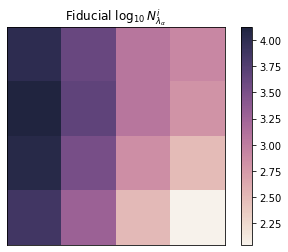

In [5]:
import matplotlib.pyplot as plt
ccmap = sns.cubehelix_palette(start=8/3, rot=5/9, as_cmap=True, light=0.95,)
# ccmap = 'rainbow'
plt.imshow(np.log10(N_fiducial), cmap=ccmap, vmin=np.min(np.log10(N_fiducial)), vmax=np.max(np.log10(N_fiducial)))
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title(r'Fiducial $\log_{10} N^i_{\lambda_\alpha}$')
plt.savefig('fiducial_cluster_abundance.pdf')

In [6]:
plt.show()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'

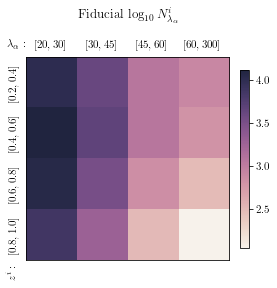

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 11


plt.figure( figsize=(4,4))
plt.tick_params(
    bottom=False,
    top=True,
labelbottom=False,
labeltop=True)
plt.gca().xaxis.set_ticks_position('none') 
plt.gca().yaxis.set_ticks_position('none') 


# Add ticks for the block divisions
tick_positions_z = [0,1,2,3]

tick_z_labels = [r'$[%d, %d]$'%(a,b) for a,b in zip(richness_bin_edges, richness_bin_edges[1:])]
plt.xticks(tick_positions_z, tick_z_labels, ha='center')

tick_z_labels = [r'$[%.1f, %.1f]$'%(a,b) for a,b in zip(z_bin_edges, z_bin_edges[1:])]
plt.yticks(tick_positions_z, tick_z_labels, rotation=90, va='center')

plt.text(-0.5,-0.67,r'$\lambda_\alpha:$', verticalalignment='bottom', horizontalalignment='right')
plt.text(-0.67,3.9,r'$z^i:$', rotation=90, verticalalignment='bottom', horizontalalignment='right')

plt.imshow(np.log10(N_fiducial), cmap=ccmap, vmin=np.min(np.log10(N_fiducial)), vmax=np.max(np.log10(N_fiducial)))
plt.colorbar(fraction=0.04)
plt.title(r'Fiducial $\log_{10} N^i_{\lambda_\alpha}$'+'\n')
plt.savefig('fiducial_cluster_abundance.pdf', dpi=600, bbox_inches = "tight")

In [8]:
cluster_count_cov = np.zeros((len(z_bin_edges) - 1, len(z_bin_edges) - 1, len(richness_bin_edges) - 1, len(richness_bin_edges) - 1))


In [9]:
halo_bias = ccl.halos.HaloBiasTinker10()

In [10]:
fiducial_h = fiducial_cosmology['H0']/100
halo_bias(fiducial_ccl_cosmo, 1e14 *  fiducial_h, 1) #[Mass] is Msun / h

1.5811452381654467

In [11]:
Ωs_rad**2

30.064534269753832

In [12]:
from classy import Class

h = fiducial_cosmology['H0']/100
cosmo_dict = {
    'h': h,
    'Omega_b': fiducial_cosmology['ombh2'] / h**2,
    'Omega_cdm': fiducial_cosmology['omch2'] / h**2,
    'N_ur': 0.00641,
    'N_ncdm': 1,
    'output': 'mPk mTk',
    'z_pk': '0.0,99',
    'P_k_max_h/Mpc': 20.,
    'm_ncdm': fiducial_cosmology['nu_mass_ev']/3,
    'deg_ncdm': 3,
    'T_cmb': 2.7255,
    'A_s': fiducial_cosmology['10^9 As'] * 10**-9,
    'n_s': fiducial_cosmology['ns'],
    'Omega_Lambda': 0.0,
    'w0_fld': fiducial_cosmology['w0'],
    'wa_fld': 0.0,
    'cs2_fld': 1.0,
    'fluid_equation_of_state': "CLP"
}

#get logsigma spline
z = np.linspace(0, 2, 100)

pkclass = Class()
pkclass.set(cosmo_dict)
pkclass.compute()

In [13]:
pkclass.pk_lin(1e-1, np.array([0.8]))*h**3 

/tmp/ipykernel_8632/123349698.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pkclass.pk_lin(1e-1, np.array([0.8]))*h**3


1416.1466363824873

/tmp/ipykernel_8632/3287391961.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PK_TEST = [pkclass.pk_lin(k_curr, np.array([0.2])) for k_curr in kt]


10.0


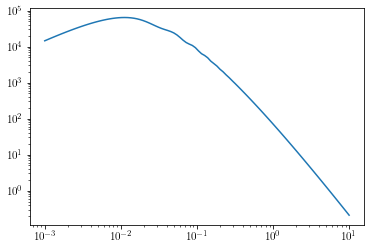

In [14]:
kt = np.logspace(-3, 1, 100)
PK_TEST = [pkclass.pk_lin(k_curr, np.array([0.2])) for k_curr in kt]
plt.plot(kt, PK_TEST)
plt.xscale('log')
plt.yscale('log')
print(np.max(kt))

In [15]:
from scipy.integrate import quad

In [16]:
from scipy.interpolate import InterpolatedUnivariateSpline

def compute_chi_integrand(z_val):
    Ωb =  fiducial_cosmology['ombh2'] / h**2
    Ωc =  fiducial_cosmology['omch2'] / h**2
    Ez = np.sqrt((Ωb+Ωc)*(1+z_val)**3 + (1-(Ωb+Ωc))) # unitless
    return DH/Ez #units of distance h^-1 Mpc
def compute_chi(z_val):
    chi, _ = quad(compute_chi_integrand, 0, z_val, epsabs=0, epsrel=1e-4)#units of h^-1 Mpc
    return chi


z_values = np.linspace(0, 2, 500)  # Create an array of z values (adjust range and number of points as needed)
chi_values = [compute_chi(z) for z in z_values]
chi_spline = InterpolatedUnivariateSpline(z_values, chi_values)

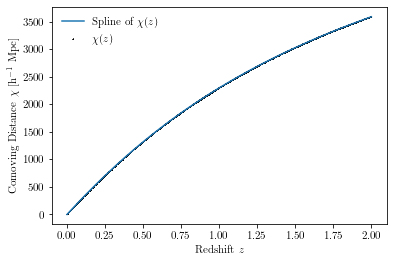

In [17]:
plt.figure()
plt.plot(z_values, chi_spline(z_values), label='Spline of $\\chi(z)$')
plt.scatter(z_values, chi_values, label=r'$\chi(z)$', s=1, marker='+', color='k')
plt.xlabel('Redshift $z$')
plt.ylabel('Comoving Distance $\\chi$ [h$^{-1}$ Mpc]')
plt.legend(frameon=False)
plt.show()


$$\begin{align} 
{\rm Cov} (N^i_{\lambda_\alpha}, N^j_{\lambda_\beta}) &= \delta_{ij} \delta_{\alpha,\beta} N^i_{\lambda_\alpha} + \Omega_s^2 \int_{\textrm{z bin overlap} } dz\ \left( \frac{dV} {dzd\Omega}  \right)^2 \frac{E(z)} {D_H} \\
&\times\left[\int dM \frac{ d n } { d M } b_h(M,z) \int_{\lambda_{\alpha,{\rm min} }}^{\lambda_{\alpha,{\rm max}}} d\lambda\ p(\lambda\mid M,z)\right]\\
&\times\left[\int dM' \frac{ d n } { d M' } b_h(M',z) \int_{\lambda_{\beta,{\rm min} }}^{\lambda_{\beta,{\rm max}}} d\lambda'\ p(\lambda'\mid M',z)\right]\\
&\times \int \frac{d^2 k_\perp}{(2\pi)^2} P_{\rm lin}(k_\perp, z) \left[\frac{ 2 J_1(k_\perp \chi(z) \theta_s)}{k_\perp \chi(z) \theta_s} \right]^2
\end{align} $$
see TakadaSpergel13 Eq (31) and Krause+17 Eq (A15) which I believe is missing $\sigma$ since the units don't work

- $\theta_s=\sqrt{\Omega_s / \pi}$ 
- $J_1$ is a bessel function
- $\chi(z)$ is computed as $$\chi(z) = D_H\int_0^z \frac{dz'}{E(z')}$$

In [18]:
from scipy.integrate import quad, dblquad
from scipy.special import jv

from functools import cache

θs = np.sqrt(Ωs_rad / np.pi)
    
@cache
def variance_integral(kperp1, kperp2, z_val):
    kperp = np.sqrt(kperp1**2 + kperp2**2) #units of h / Mpc
    #kperp*h has units 1 / Mpc
    Plin = pkclass.pk_lin(kperp*h, np.array([z_val]))*h**3 #units of Mpc^3/h^3 
    chi = chi_spline(z_val)
    arg = 2*jv(1, kperp*chi*θs) / (kperp*chi*θs) #unitless
    return Plin * arg**2 / (2*np.pi)**2 #units of Mpc^3/h^3 ~ distance^3

@cache
def inner_integral(lam, M, z_val):
    p = cluster_richness_relation(M, lam, z_val)
    dn_dM = emulator(fiducial_ccl_cosmo, M/h, redshiftToScale(z_val)) /(h**3 * M * np.log(10)) # h^4 / Mpc^3 Msun

    bh = halo_bias(fiducial_ccl_cosmo, M * fiducial_h, 1./(1+z_val))
    return p * dn_dM  * bh

    

MAX_K = 10
def outer_integral(z_val, lam_alpha_min, lam_alpha_max, lam_beta_min, lam_beta_max):
    integral_M_val, _ = dblquad(inner_integral, M_min, M_max, lam_alpha_min, lam_alpha_max,
                             args=(z_val,), 
                             epsrel=1e-4, epsabs=0)

    integral_M_prime_val, _ = dblquad(inner_integral, M_min, M_max, lam_beta_min, lam_beta_max,
                             args=(z_val,), 
                             epsrel=1e-4, epsabs=0)
    
    d2V_dzdOmega = comoving_volume_elements(z_val, cosmo=fiducial_ccl_cosmo)
    h = fiducial_cosmology['H0']/100
    Ωb =  fiducial_cosmology['ombh2'] / h**2
    Ωc =  fiducial_cosmology['omch2'] / h**2

    Ez = np.sqrt((Ωb+Ωc)*(1+z_val)**3 + (1-(Ωb+Ωc))) # unitless
    
    variance, _ = dblquad(variance_integral, 0, MAX_K, 0, MAX_K, args=(z_val,), epsrel=1e-4, epsabs=0)

    return Ωs_rad**2 * integral_M_val * integral_M_prime_val * d2V_dzdOmega**2 * Ez/DH * variance







In [19]:
# test, _ = quad(outer_integral, 
#                          0.2, 0.4, 
#                          args=(20, 30, 
#                                20, 30),
#                         epsrel=1e-4, epsabs=0)
# print('%.1e'%(test))

In [20]:
# all_bin_combos = [[i,j,a,b] for i in range(len(z_bin_edges) - 1) 
#  for j in range(len(z_bin_edges) - 1) 
#  for a in range(len(richness_bin_edges) - 1)
# for b in range(len(richness_bin_edges) - 1)]


# for i,j,a,b in tqdm(all_bin_combos):
#     zi_min = z_bin_edges[i]
#     zi_max = z_bin_edges[i + 1]
#     zj_min = z_bin_edges[j]
#     zj_max = z_bin_edges[j + 1]
#     #from Eq(6) of Krause+17, it seems like supersample variance only
#     #when the redshift bins overlap. so we can ignore when
#     #zi != zj
#     if(i != j):
#         continue
#     la_min = richness_bin_edges[a]
#     la_max = richness_bin_edges[a + 1]
#     lb_min = richness_bin_edges[b]
#     lb_max = richness_bin_edges[b + 1]
#     result, error = quad(outer_integral, 
#                          zi_min, zi_max, 
#                          args=(la_min, la_max, 
#                                lb_min, lb_max),
#                         epsrel=1e-4, epsabs=0)
#     cluster_count_cov[i,j,a,b] = result 
#     if(i == j and a == b): #shot noise
#         cluster_count_cov[i,j,a,b] +=  N_fiducial[i][a]


In [21]:
from datetime import datetime

def get_file(file_path):
    # Get the last modified time
    last_modified_time = os.path.getmtime(file_path)
    # Convert it to a human-readable format
    human_readable_time = datetime.fromtimestamp(last_modified_time).strftime('%Y-%m-%d %H:%M:%S')
    print(f"The file {file_path} was last modified on: {human_readable_time}")

    with open(file_path, 'rb') as file:
        return pickle.load(file)
    
    
cluster_count_cov = get_file(oup_cov_fname)

The file fiducial_cluster_abundance_covariance_1e9As_2p100000_ns_0p964900_H0_67p360000_w0_-1p000000_ombh2_0p022370_omch2_0p120000_nu_mass_ev_0p060000.pkl was last modified on: 2024-07-15 22:53:36


In [22]:
# import pickle
    
# with open('cluster_abundance_fiducial_covariance.pkl', 'wb') as file:
#         pickle.dump(cluster_count_cov, file)

In [23]:
n_z = len(z_bin_edges) - 1
n_r = len(richness_bin_edges) - 1
cov_matrix_2d = np.zeros((n_z * n_r, n_z * n_r))

for i in range(n_z):
    for j in range(n_z):
        for a in range(n_r):
            for b in range(n_r):
                row_index = i * n_r + a
                col_index = j * n_r + b
                cov_matrix_2d[row_index, col_index] = cluster_count_cov[i, j, a, b]


In [24]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'


In [25]:
import seaborn as sns

In [26]:
np.linspace(0, 3, 10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

/tmp/ipykernel_8632/3837494037.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(cov_matrix_2d), cmap=ccmap, aspect=1, vmin=-1, vmax=4.5)


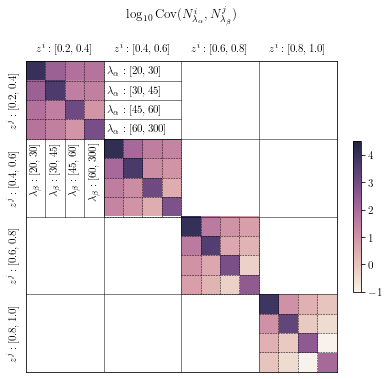

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'

plt.figure( figsize=(6,6))

ccmap = sns.cubehelix_palette(as_cmap=True)
ccmap = sns.cubehelix_palette(start=8/3, rot=5/9, as_cmap=True, light=0.95,)
# ccmap = 'rainbow'
plt.imshow(np.log10(cov_matrix_2d), cmap=ccmap, aspect=1, vmin=-1, vmax=4.5)
plt.xticks([])
plt.yticks([])
plt.tick_params(
    bottom=False,
    top=True,
labelbottom=False,
labeltop=True)
plt.gca().xaxis.set_ticks_position('none') 
plt.gca().yaxis.set_ticks_position('none') 


# Add ticks for the block divisions
tick_positions_z = np.arange(n_r, n_r * n_z+1, n_r) - 2.5

tick_z_labels = [r'$z^i:[%.1f, %.1f]$'%(a,b) for a,b in zip(z_bin_edges, z_bin_edges[1:])]
plt.xticks(tick_positions_z, tick_z_labels, ha='center')

tick_z_labels = [r'$z^j:[%.1f, %.1f]$'%(a,b) for a,b in zip(z_bin_edges, z_bin_edges[1:])]
plt.yticks(tick_positions_z, tick_z_labels, rotation=90, va='center')

lambda_labels = [r'$\lambda_\alpha:[%d, %d]$'%(a,b) for a,b in zip(richness_bin_edges, richness_bin_edges[1:])]
lambda_labels_0 = [r'$\lambda_\beta:[%d, %d]$'%(a,b) for a,b in zip(richness_bin_edges, richness_bin_edges[1:])]

lw=0.5
for i,l in enumerate(lambda_labels):
    plt.text(3.65 , i,
            s=l,
            horizontalalignment='left',
            verticalalignment='center',)
    plt.text(i , 3.65,
            s=lambda_labels_0[i],
            horizontalalignment='center',
            verticalalignment='top',
             rotation=90,)
    plt.axvline(i+0.5, .5, .75, linewidth=lw, linestyle='-', color='k')
    plt.axhline(i+0.5, 0.25, 0.5, linewidth=lw, linestyle='-', color='k')

    for j in range(n_z):
        plt.axvline(i+0.5+n_z*j, 0.75-0.25*j,1-0.25*j, linewidth=lw, linestyle='--', color='k')
        plt.axhline(i+0.5+n_z*j, 0+0.25*j,0.25+0.25*j, linewidth=lw, linestyle='--', color='k')

for a in tick_positions_z:
    plt.axvline(a+2, color='black', linestyle='-', linewidth=lw)
    plt.axhline(a+2, color='black', linestyle='-', linewidth=lw)
plt.colorbar(fraction=0.0225)

plt.title(r'$\log_{10}{\rm Cov}(N^i_{\lambda_\alpha} , N^j_{\lambda_\beta})$' + '\n')
plt.savefig('cluster_abundance_cov.pdf', dpi=600, bbox_inches = "tight")

0


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

1


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

2


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

3


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

4


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

5


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

6


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

7


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

8


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

9


/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));
/tmp/ipykernel_8632/3764007105.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

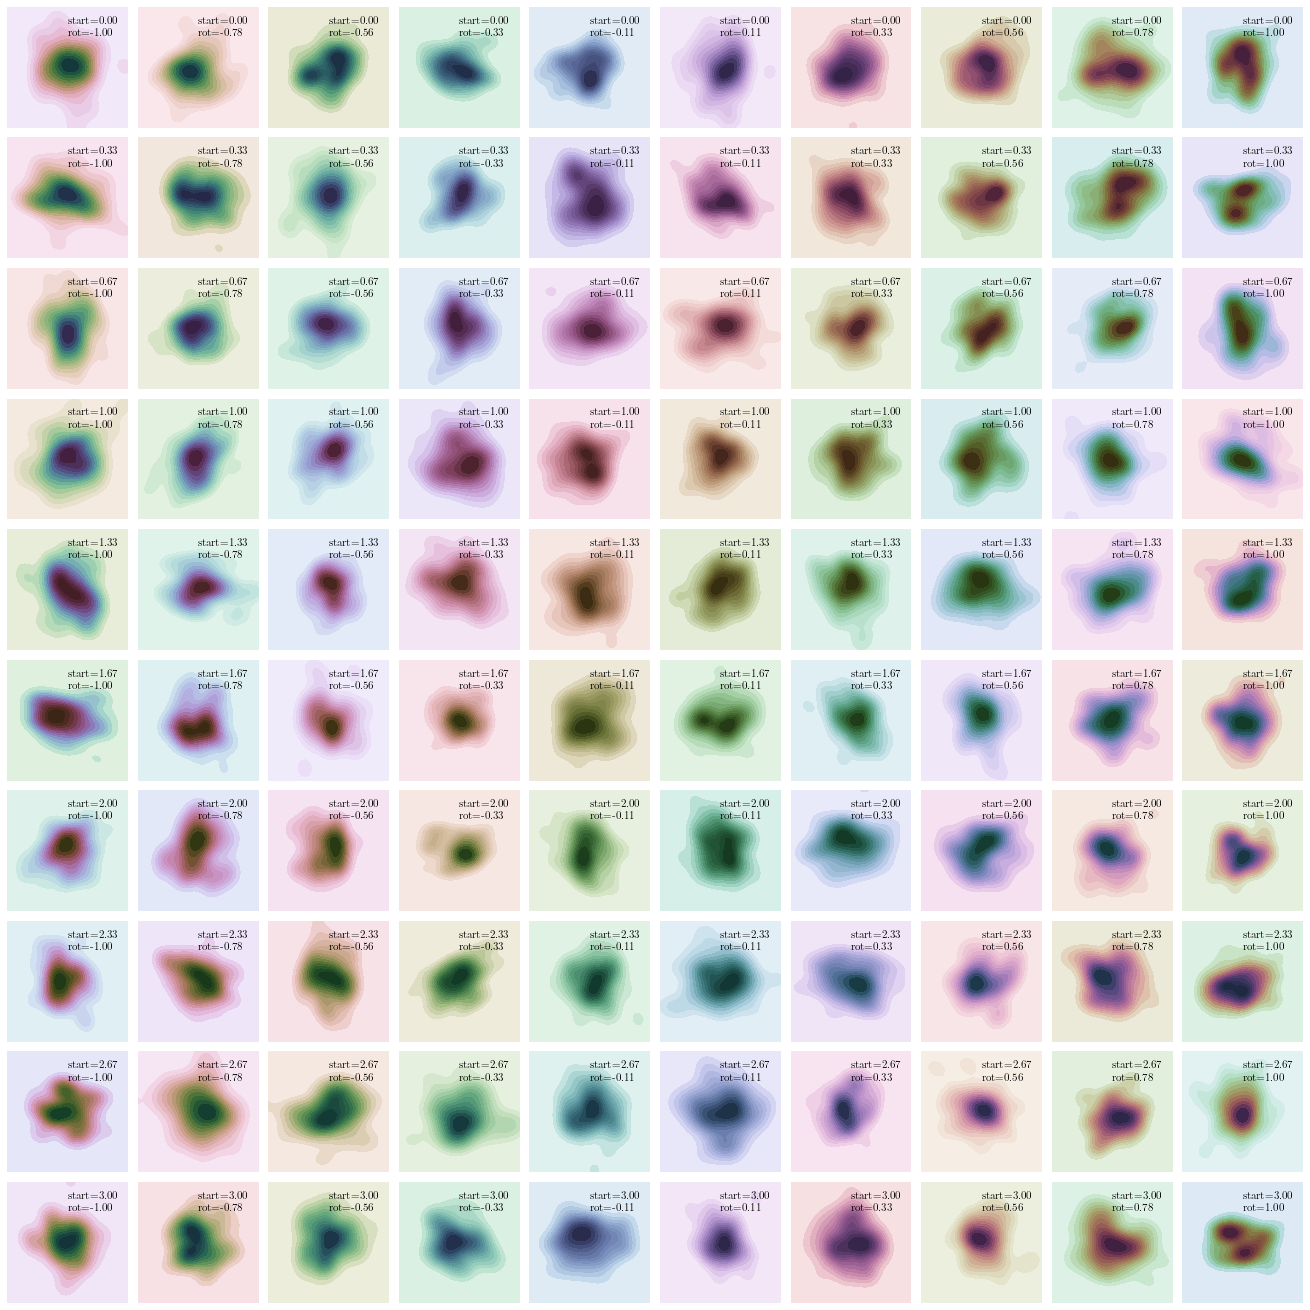

In [28]:
f, axes = plt.subplots(10, 10, figsize=(18, 18), sharex=True, sharey=True)
rs = np.random.RandomState(50)
for ii,i in enumerate(np.linspace(0, 3, 10)):
    print(ii)
    for jj,j in enumerate(np.linspace(0, 2, 10)):
        ax = axes[ii][jj]
        cmap = sns.cubehelix_palette(start=i, rot=-1+j, as_cmap=True, light=.95,)
        
        x, y = rs.normal(size=(2, 50))
        sns.kdeplot(
            x=x, y=y,
            cmap=cmap, fill=True,
            clip=(-5, 5), cut=10,
            thresh=0, levels=15,
            ax=ax,
        )
        ax.set_axis_off()
        ax.legend(frameon=False, title='start=%.2f\nrot=%.2f'%(i,-1+j));

ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
f.subplots_adjust(0, 0, 1, 1, .08, .08)
